In [2]:
import numpy as np

In [3]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
# Simple way of iterating through this array
for i in a:
  print(i)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]


In [5]:
# If you want to print individual element from the Array using for loop
for i in a:
  for element in i:
    print(element)

0
1
2
3
4
5
6
7
8
9
10
11


In [6]:
# If you just want to flatten the array into the list, you can use the flatten function
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
for i in a.flatten():
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11


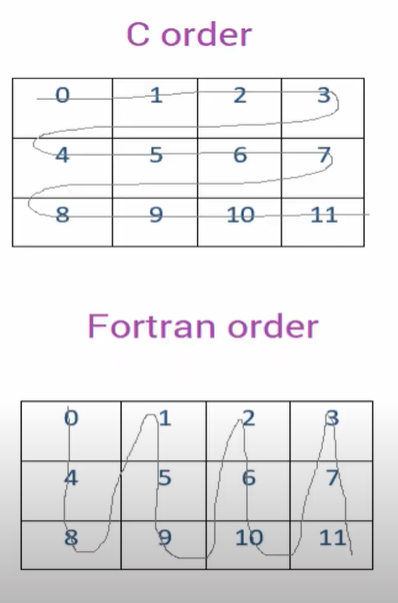

In [8]:
# NumPy has a function called numpy.nditer which allows you to do more sophisticated way of iteration
# This prints in C order which going row by row
for x in np.nditer(a,order='C'):
  print(x)

0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
# This prints in F order which going column by column
for x in np.nditer(a,order='F'):
  print(x)

0
4
8
1
5
9
2
6
10
3
7
11


In [10]:
# Check DOCUMNETATION of nditer

In [11]:
# The flags object can be accessed dictionary-like (as in a.flags['WRITEABLE']), or by using lowercased attribute names (as in a.flags.writeable). 
# Short flag names are only supported in dictionary access.

In [12]:
# Let's check the external loop function
# This means that you want to go in the F order but instead going element by element, I want to print column by column

# The nditer will try to provide chunks that are as large as possible to the inner loop. 
# By forcing ‘C’ and ‘F’ order, we get different external loop sizes. This mode is enabled by specifying an iterator flag.

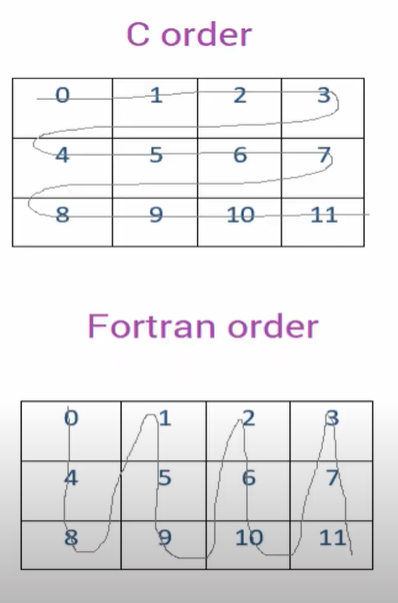

In [13]:
# Example:
# NOTE IT IS NESECCARY TO USE A FOR LOOP OTHERWISE YOUR RESULT WILL BE LIKE THIS OUTPUT
x = np.nditer(a,order='F', flags=['external_loop'])
print(x)

In [14]:
x = np.nditer(a,order='F', flags=['external_loop'])
for i in x:
  print(i)

[0 4 8]
[1 5 9]
[ 2  6 10]
[ 3  7 11]


In [15]:
# Let's say you are iterating through the array and you want to modify the elements
# You can do that using readwrite  op flags

# Let's say I want to create a square of each of these elements and I want to MODIFY the ORIGINAL ARRAY
# Don't be afraid of the Syntax, you don't need to memeorize it, just look at the documentation or Internet when working on a specific project
for x in np.nditer(a,op_flags=['readwrite']):
  x[...]=x*x
  print(x)

0
1
4
9
16
25
36
49
64
81
100
121


In [16]:
# You'll notice that our ORIGINAL ARRAY is modified
a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [17]:
# How do you iterate through two NumPy arrays simultaneously?
# 3 x 1 Array
b = np.arange(3,15,4).reshape(3,1)
b

array([[ 3],
       [ 7],
       [11]])

In [18]:
# Now I want to iterate through these two arrays simultanously
# NOTE: In order to this your array should be brodcastable which means either their shape should be same or one of the dimensions in one of the array should be 1
# READ GENERAL BRODCASTING RULES ON NUMPY
for x,y in np.nditer([a,b]):
  print(x,y)

0 3
1 3
4 3
9 3
16 7
25 7
36 7
49 7
64 11
81 11
100 11
121 11


In [19]:
# CHECK THIS ERROR IN RELATION TO CELL 18
b = np.arange(3,15,4).reshape(4,1)
b

ValueError: ignored